# Isolation Forest
This notebook is for training and understanding purposes only. All algorithms and credits go to pyimagesearch.com, specifically https://www.pyimagesearch.com/2020/01/20/intro-to-anomaly-detection-with-opencv-computer-vision-and-scikit-learn/ and Adrian Rosebrock (A wonderful source and inspiration for Computer Vision and Deep Learning)


As this notebook is for training and understanding purposes, rather than downloading the source code right away. The code will be typed in order to build "muscle-memory". Author-readable comments will appear from time to time.

Isolation forest is a technique to detect anomalies, using what Liu et. al (2012) (https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tkdd11.pdf) called an isolation mechanism. It is fundamentally different from using any distance or density measure (i.e. one-class SVM) to detect anomalies. It exploits the quantitative properties of anomalies (i.e. they are few and very different from normal data). 

<br>
The principle is that using a decision tree. An anomaly will not tranverse down to the leaf, rather get "stopped" up in the upper echelon of the decision tree. Also, the number of trees that the anomaly could tranverse should also be less. Two key parameters are (a) number of trees (b) subsampling size

<br>
The benefit is that iForest is able to achieve low linear time-complexity with small memory footprint. **It eliminates the computational cost of calculating distance measures !**

In [12]:
# we create a function to return a feature vector for images
# specifically we use color histogram

from imutils import paths
import numpy as np
import cv2

def quantify_image(image, bins = (4,6,3)):
    hist = cv2.calcHist([image], [0,1,2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

def load_dataset(datasetPath, bins):
    imagePaths = list(paths.list_images(datasetPath))
    data = []
    
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        features = quantify_image(image, bins)
        data.append(features)
        
    return np.array(data)

In [13]:
dataset_path = r"H:\AI\intro-anomaly-detection\forest"

In [14]:
from sklearn.ensemble import IsolationForest
# import argparse
# import pickle

# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True, help="path to dataset of images")
# ap.add_argument("-m", "--model", required=True, help="path to output anomaly detection model")
# args = vars(ap.parse_args())

print("[INFO] preparing dataset...")
# data = load_dataset(args["dataset"], bins=(3, 3, 3))
data = load_dataset(dataset_path, bins=(3, 3, 3))
# train the anomaly detection model
print("[INFO] fitting anomaly detection model...")
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(data)

# f = open(args["model"], "wb")
# f.write(pickle.dumps(model))
# f.close()

[INFO] preparing dataset...
[INFO] fitting anomaly detection model...


c:\users\mcheong\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

Now that we have a model, let's test out with a test image !

c:\users\mcheong\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\users\mcheong\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\users\mcheong\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\users\mcheong\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


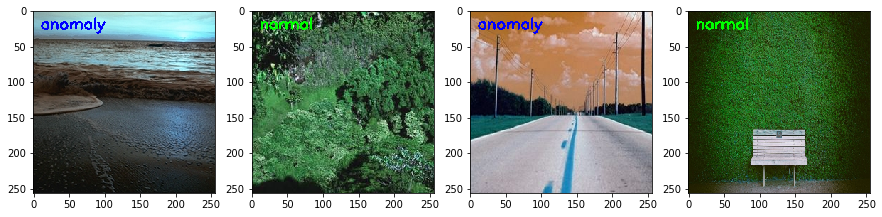

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

test_path = r"H:\AI\intro-anomaly-detection\examples"
# print("[INFO] loading anomaly detection model...")
# model = pickle.loads(open(args["model"], "rb").read())


fig, ax = plt.subplots(1,4, figsize=(15,15))
# image = cv2.imread(args["image"])
for index, test_image in enumerate(list(paths.list_images(test_path))):
    image = cv2.imread(test_image)
    
    if image.shape != (256, 256, 3):
        image = cv2.resize(image, (256, 256))

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    features = quantify_image(hsv, bins=(3, 3, 3))

    preds = model.predict([features])[0]
    label = "anomaly" if preds == -1 else "normal"
    color = (0, 0, 255) if preds == -1 else (0, 255, 0)

    cv2.putText(image, label, (10,  25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    # display the image
    # cv2.imshow("Output", image)
    ax[index].imshow(image)

How does performance of iForest works in very similar case that has high amount of greenery, but not necessarily forest?

It performs pretty weak, especially because it's not really a forest. What's the extent of the Isolation Forest technique? timeseries?